# <font size=7> 10장 포트폴리오 이론</font>

### 포트폴리오 이론에서의 베타(β) 계수

#### 위험 구분
- **비체계적 위험 (Unsystematic Risk)**  
  : 자산의 수익률에 영향을 미치는 자산 자체의 고유한 요인  
- **체계적 위험 (Systematic Risk)**  
  : 시장에 속한 모든 자산의 수익률에 영향을 미치는 요소

---

#### 베타 계수 (β)

##### 정의
 β = Cov[A,B]/ Var(B)  (A:자산 혹은 포트폴리오 수익률, B: 시장 수익률(S%P500, KOSPI)


- **A** : 자산 또는 포트폴리오 수익률  
- **B** : 시장 수익률 (예: S&P500, KOSPI)


##### 의미
- 시장이 1% 변할 때 해당 자산 수익률이 몇 % 변하는지 측정


##### 해석
1. **β = 1**
   - 시장과 동일하게 움직임 → 시장 평균 위험 수준  
2. **β > 1**
   - 시장보다 민감하게 움직임 → 변동성·위험이 시장보다 큼  
3. **β < 1**
   - 시장보다 덜 움직임 → 방어적 성격


### 코드 10-1 베타 계수 계산1

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import yfinance as yf
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [54]:
stock_tickers = ['AAPL', 'TSLA', 'KO', 'JNJ']
market_ticker = ['SPY']
tickers = stock_tickers + market_ticker

stocks = yf.download(tickers, '2019-01-01', '2021-01-01', multi_level_index=False, auto_adjust=False)['Adj Close']
returns = stocks.pct_change().dropna()
covariance = returns.cov()

print('=== Beta of Stocks ===')
for ticker in stock_tickers:
    beta = covariance.loc[ticker,'SPY']/returns['SPY'].var() #정의식을 이용한 베타 계수 계산
    print(f'{ticker}: {beta:.4f}')

[*********************100%***********************]  5 of 5 completed

=== Beta of Stocks ===
AAPL: 1.2058
TSLA: 1.2813
KO: 0.7878
JNJ: 0.6731


### 코드 10-2 베타 계수 계산2

In [56]:
X = returns['SPY']
X_const = sm.add_constant(X)
print('=== Beta of Stocks ===')
for ticker in stock_tickers: 
    Y = returns[ticker]
    model = sm.OLS(Y, X_const).fit() #선형 회귀를 이용한 베타 계수 계산
    beta = model.params['SPY']
    print(f'{ticker}: {beta:.4f}')

=== Beta of Stocks ===
AAPL: 1.2058
TSLA: 1.2813
KO: 0.7878
JNJ: 0.6731


### 그림 10-1 주식 누적 수익률 그래프

In [58]:
stocks = yf.download(tickers, '2021-01-01', '2023-01-01', multi_level_index=False, auto_adjust=False)['Adj Close']

[*********************100%***********************]  5 of 5 completed


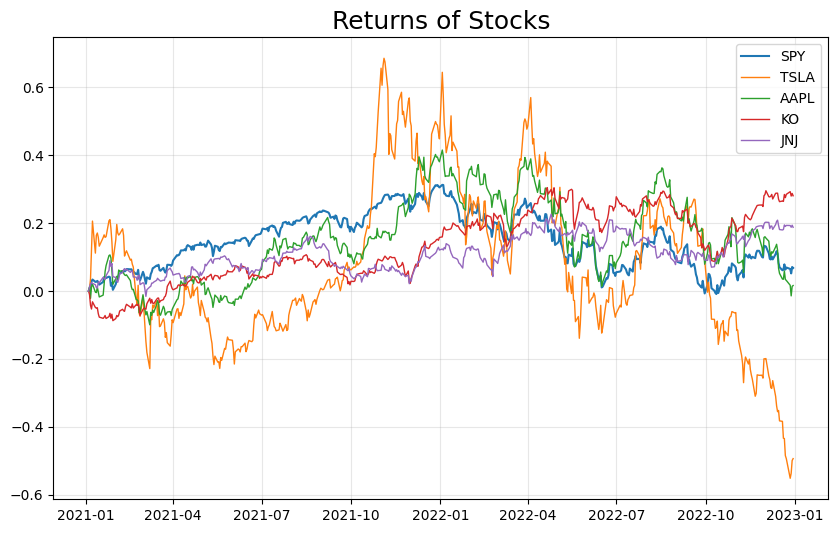

In [59]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(stocks.index, stocks['SPY']/stocks['SPY'].iloc[0]-1, label='SPY', linewidth=1.5)
ax.plot(stocks.index, stocks['TSLA']/stocks['TSLA'].iloc[0]-1, label='TSLA', linewidth=1)
ax.plot(stocks.index, stocks['AAPL']/stocks['AAPL'].iloc[0]-1, label='AAPL', linewidth=1)
ax.plot(stocks.index, stocks['KO']/stocks['KO'].iloc[0]-1, label='KO', linewidth=1)
ax.plot(stocks.index, stocks['JNJ']/stocks['JNJ'].iloc[0]-1, label='JNJ', linewidth=1)
ax.set_title('Returns of Stocks', fontsize=18)
ax.legend()
ax.grid(alpha=0.3)
plt.show()

### AAPL과 SH(S&P500 지수 1배수 인버스 ETF)에 대한 일간 수익률의 평균과 분산

In [61]:
stocks = yf.download(['AAPL', 'SH'], '2022-01-01', '2024-01-01', multi_level_index=False, auto_adjust=False)['Adj Close']
returns = stocks.pct_change().dropna() #pct_change():백분율 변화율, dropna():NaN 값을 제거
stock_ret = returns.mean()
stock_vol = returns.std()

print(f'AAPL의 일간 기대 수익률: {100*stock_ret['AAPL']:.3f}%')
print(f'AAPL의 일간 위험: {stock_vol['AAPL']:.4f}') #일간 수익률의 표준편차
print(f'SH의 일간 기대 수익률: {100*stock_ret['SH']:.3f}%')
print(f'SH의 일간 위험: {stock_vol['SH']:.4f}\n')

cov_matrix = returns.cov()
print('Covariance Matrix')
print(cov_matrix)

[*********************100%***********************]  2 of 2 completed

AAPL의 일간 기대 수익률: 0.030%
AAPL의 일간 위험: 0.0183
SH의 일간 기대 수익률: 0.010%
SH의 일간 위험: 0.0123

Covariance Matrix
Ticker      AAPL        SH
Ticker                    
AAPL    0.000335 -0.000190
SH     -0.000190  0.000151


### 코드 10-4 AAPL과 SH로 구성된 포트폴리오의 일간 수익률의 평균과 분산 계산

In [63]:
num_portfolio = 5000
weight = np.zeros((num_portfolio,2)) # w1, w2
portfolio_ret = np.zeros(num_portfolio) # mu_Y
portfolio_vol = np.zeros(num_portfolio) # sigma_Y

for k in range(num_portfolio):
    w = np.random.random(2)
    w = w/np.sum(w)
    weight[k,:] = w
    portfolio_ret[k] = np.sum(w*stock_ret)
    portfolio_vol[k] = np.sqrt( np.dot(w, np.dot(cov_matrix,w)) )

min_idx = portfolio_vol.argmin()
print(f'포트폴리오 일간 최소 위험: {portfolio_vol[min_idx]:.4f}') #0.41%의 최소 일간 변동성
print(f'최소 위험 가중치: {weight[min_idx,:]}') #자산 A비중 39.34%, 자산 B비중 60.66% 투자 해야 최소 위험 달성

포트폴리오 일간 최소 위험: 0.0041
최소 위험 가중치: [0.39338923 0.60661077]


### 코드 10-5 AAPL과 SH로 구성된 포트폴리오의 일간 수익률의 평균과 표준편차 그래프 출력

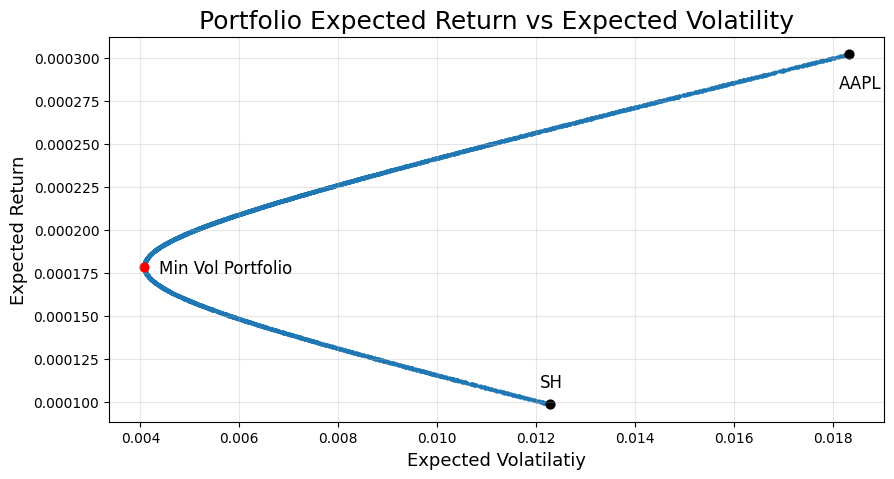

In [65]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(portfolio_vol, portfolio_ret, s=3)

ax.scatter(portfolio_vol[min_idx], portfolio_ret[min_idx], c='r', s=40)
ax.scatter(stock_vol['AAPL'], stock_ret['AAPL'], c='k', s=40)
ax.scatter(stock_vol['SH'], stock_ret['SH'], c='k', s=40)

ax.text(portfolio_vol[min_idx]+0.0003, portfolio_ret[min_idx]-0.000004, \
         'Min Vol Portfolio', fontsize=12) #변동성이 가장 낮은 최소 위험 포트폴리오
ax.text(stock_vol['AAPL']-0.0002, stock_ret['AAPL']-0.00002, \
         'AAPL', fontsize=12)
ax.text(stock_vol['SH']-0.0002, stock_ret['SH']+0.00001, \
         'SH', fontsize=12) #개별 자산(AAPL, SH) 단독 투자 시 위치

ax.set_title('Portfolio Expected Return vs Expected Volatility', fontsize=18)
ax.set_xlabel('Expected Volatilatiy', fontsize=13)
ax.set_ylabel('Expected Return', fontsize=13)
#pset_lt.xlim(0.0,0.045)
#plt.ylim(0.0,0.0065)
ax.grid(alpha=0.3)
plt.show()

### 코드 10-6 6개 종목으로 구성된 포트폴리오의 일간 수익률의 평균과 표준편차 계산

In [67]:
tickers = ['AAPL','GE','TSLA','F','CVX','AMZN'] #6종목은 서로 산업이 분산되어 있어 포트폴리오 구성 시 분산투자 효과 기대 가능성
stocks = yf.download(tickers, '2020-01-01', '2021-07-01', multi_level_index=False, auto_adjust=False)['Adj Close']
returns = stocks.pct_change().dropna()
stock_ret = returns.mean()
stock_vol = returns.std()
cov_matrix = returns.cov()

num_portfolio = 100000
weight = np.zeros((num_portfolio,6))
portfolio_ret = np.zeros(num_portfolio)
portfolio_vol = np.zeros(num_portfolio)
sharpe_ratio = np.zeros(num_portfolio)

for k in range(num_portfolio):
    w = np.random.random(6)
    w = w/np.sum(w)
    weight[k,:] = w
    portfolio_ret[k] = np.sum(w*stock_ret)
    portfolio_vol[k] = np.sqrt( np.dot(w.T, np.dot(cov_matrix,w)) )
    sharpe_ratio[k] = portfolio_ret[k]/portfolio_vol[k]
    
min_idx = portfolio_vol.argmin()
max_idx = sharpe_ratio.argmax()

print('=== 최소 분산 포트폴리오 ===')
print(f'일간 수익률 변동성: {portfolio_vol[min_idx]:.4f}, 일간 수익률 기댓값: '\
f'{portfolio_ret[min_idx]:.4f}')
print(f'가중치: {weight[min_idx,:]}')
print('=== 최대 샤프 비율 포트폴리오 ===')
print(f'일간 수익률 변동성: {portfolio_vol[max_idx]:.4f}, 일간 수익률 기댓값: '\
f'{portfolio_ret[max_idx]:.4f}')
print(f'가중치: {weight[max_idx,:]}')

[*********************100%***********************]  6 of 6 completed


=== 최소 분산 포트폴리오 ===
일간 수익률 변동성: 0.0190, 일간 수익률 기댓값: 0.0017
가중치: [0.00985884 0.62954168 0.06716118 0.11514188 0.16115796 0.01713846]
=== 최대 샤프 비율 포트폴리오 ===
일간 수익률 변동성: 0.0345, 일간 수익률 기댓값: 0.0047
가중치: [0.01893192 0.24531076 0.01426087 0.14605894 0.00278532 0.57265219]


### 코드 10-7 6개 종목으로 구성된 포트폴리오의 일간 수익률의 평균과 표준편차 그래프 출력

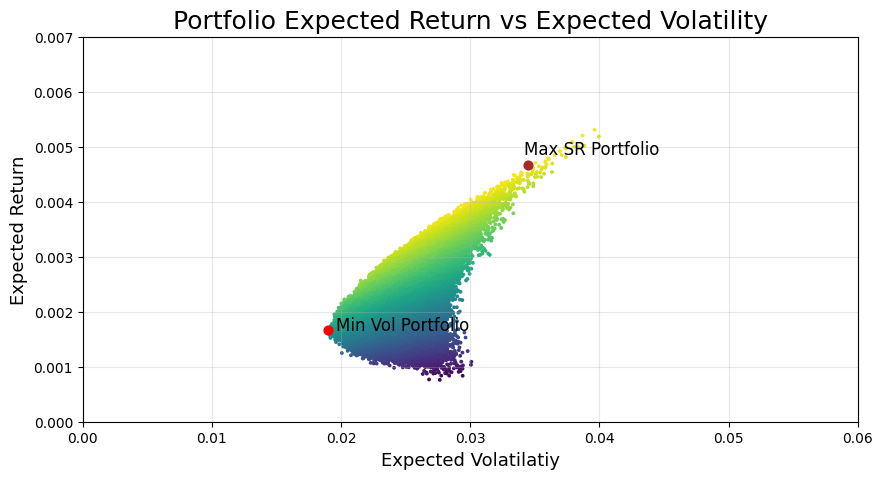

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(portfolio_vol, portfolio_ret, s=3, c=sharpe_ratio)

ax.scatter(portfolio_vol[min_idx], portfolio_ret[min_idx], c='r', s=40)
ax.scatter(portfolio_vol[max_idx], portfolio_ret[max_idx], c='brown', s=40)

ax.text(portfolio_vol[min_idx]+0.0006, portfolio_ret[min_idx]-0.000004, \
         'Min Vol Portfolio', fontsize=12) # 최소 변동성 포트폴리오 - 안정적이나 수익률은 상대적으로 낮음
ax.text(portfolio_vol[max_idx]-0.0003, portfolio_ret[max_idx]+0.0002, \
         'Max SR Portfolio', fontsize=12) # 최대 샤프비율 포트폴리오 - 위험 대비 수익률이 가장 좋은 포트폴리오

ax.set_title('Portfolio Expected Return vs Expected Volatility', fontsize=18)
ax.set_xlabel('Expected Volatilatiy', fontsize=13)
ax.set_ylabel('Expected Return', fontsize=13)
ax.set_xlim(0.0, 0.06)
ax.set_ylim(0.0, 0.007)
ax.grid(alpha=0.3)
plt.show()

In [70]:
# Finiding weights that Maximize the Sharp Ratio by minimizing the negative Sharp Ratio 
# 최대 샤프비율 포트폴리오의 최적 가중치

# Objective function
def target(w):
    R_p = np.sum(w*expected_ret)                     # 포트폴리오 예상 수익률
    V_p = np.sqrt(np.dot(w.T,np.dot(cov_matrix,w)))  # 포트폴리오 변동성
    SR = R_p/V_p                                     # 샤프비율
    return -SR                                       # 음수로 반환(최대화 ↔ 최소화 변환)

w0 = [1/6,1/6,1/6,1/6,1/6,1/6] #Initial weights 초기 가중치
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1)) # 경계조건 (Bounds): 각 가중치는 0~1 사이
constraints = ({'type':'eq','fun':lambda x:np.sum(x)-1}) #제약조건: 가중치 합이 1이 되도록 강제 (즉, 100% 투자)
w_opt = minimize(target, w0, method='SLSQP', bounds=bounds, constraints=constraints) #최적화 실행
# w_opt

NameError: name 'expected_ret' is not defined

In [ ]:
# Optimal Weights
np.round(list(w_opt.x),3)

$minimize\quad \sigma =\sqrt { w^T C w }$\
$subject\;to\quad (1)\:bounds:\; 0 \leq w_i \leq 1$\
$\quad\quad\quad\quad\;\;(2)\:constraints:\;\Sigma_i w_i -1=0,\;\;\Sigma_i w_i \mu_i -r_p =0$

### 코드 10-8 6개 종목으로 구성된 포트폴리오의 효율적 투자선 계산

In [76]:
from scipy.optimize import minimize

# 기대 수익률 범위
rets = np.linspace(np.min(portfolio_ret), np.max(portfolio_ret), 100) 
opt_vol = []

# 목적 함수 Objective function
def PF_Vol(w):
    V = np.sqrt(np.dot(w.T, np.dot(cov_matrix,w)))
    return V

# 가중치 초기값
w0 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# 최적화 실행
for ret in rets:
    # 제약 조건 Constraints
    bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
    constraints = ({'type':'eq','fun':lambda x:np.sum(x)-1}, \
                   {'type':'eq','fun':lambda x:np.sum(stock_ret*x)-ret})
    # 최적화
    opt = minimize(PF_Vol, w0, method='SLSQP', bounds=bounds, \
                   constraints=constraints)
    opt_vol.append(opt['fun'])

### 코드 10-9 6개 종목으로 구성된 포트폴리오의 효율적 투자선 시각화

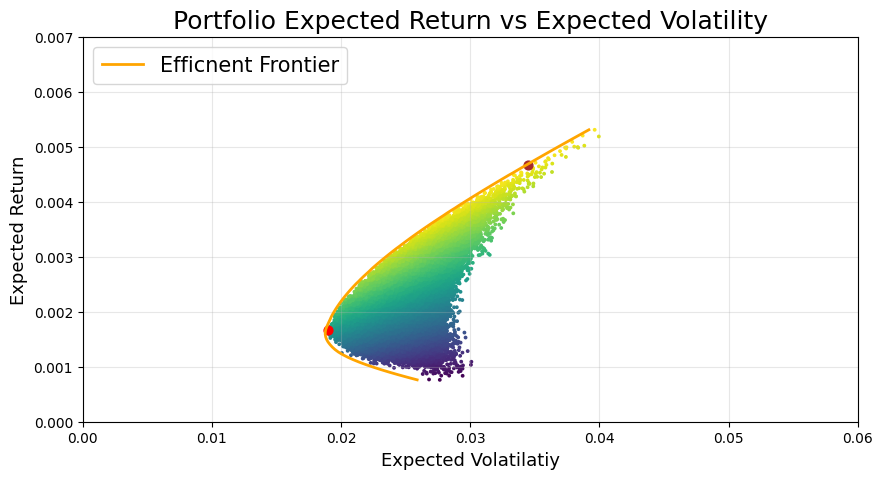

In [78]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(portfolio_vol, portfolio_ret, s=3, c=sharpe_ratio)

ax.scatter(portfolio_vol[min_idx], portfolio_ret[min_idx], c='r', s=40)
ax.scatter(portfolio_vol[max_idx], portfolio_ret[max_idx], c='brown', s=40)

ax.plot(opt_vol, rets, c='orange', linewidth=2, label='Efficnent Frontier') #주어진 위험 수준에서 가장 높은 수익률을 제공하는 포트폴리오 집합
# ax.text(sigma[min_idx]+0.0006, mu[min_idx]-0.000004, \                    # 합리적 투자자가 선택할 수 있는 최적 조합들의 경계선
#          'Min Vol Portfolio', fontsize=12)
# ax.text(sigma[max_idx]-0.0003, mu[max_idx]+0.0002, \
#          'Max SR Portfolio', fontsize=12)

ax.set_title('Portfolio Expected Return vs Expected Volatility', fontsize=18)
ax.set_xlabel('Expected Volatilatiy', fontsize=13)
ax.set_ylabel('Expected Return', fontsize=13)
ax.set_xlim(0.0, 0.06)
ax.set_ylim(0.0, 0.007)
ax.legend(loc='upper left', fontsize=15)
ax.grid(alpha=0.3)
plt.show()

In [ ]:
# 3. 해석 포인트
# 효율적 프론티어 특징
# - 곡선 위 포트폴리오는 동일 변동성에서 최대 수익률 제공
# - 곡선 아래 점들은 비효율적 포트폴리오(같은 위험에 더 낮은 수익)

# 위험-수익 선택
# - 안정성 중시 → Min Vol 지점 근처 선택
# - 수익률 중시 → Max Sharpe 지점 혹은 프론티어 상단 선택

# 분산 투자 효과
# - 단일 종목보다 프론티어 곡선의 왼쪽 아래로 이동 (위험 분산)
# - 6종목 산업군(IT, 전기차, 에너지 등) 분산 효과 반영